In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("All the Universities of Pakistan.csv")

# Display first 5 rows
df.head()


,University,Location,Province,Established,Campuses,Specialization,Type
0,Riphah International University,Islamabad,Federal Capital Territory,2002,"Faisalabad,Lahore,Malakand",General,Private
1,Capital University of Science & Technology,Islamabad,Federal Capital Territory,1998,NaN,General,Private
2,Quaid-i-Azam University,Islamabad,Federal Capital Territory,1967,NaN,General,Public
3,Pakistan Institute of Engineering and Applied ...,Islamabad,Federal Capital Territory,1967,NaN,General,Public
4,"National Defence University, Pakistan",Islamabad,Federal Capital Territory,1970,NaN,General,Public


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   University      227 non-null    object
 1   Location        227 non-null    object
 2   Province        227 non-null    object
 3   Established     227 non-null    int64 
 4   Campuses        64 non-null     object
 5   Specialization  227 non-null    object
 6   Type            227 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.5+ KB


In [15]:

df.describe()



University          0
Location            0
Province            0
Established         0
Campuses          163
Specialization      0
Type                0
dtype: int64

In [17]:
df.isnull().sum()


,Established
count,227.000000
mean,1990.718062
std,34.033037
min,1860.000000
25%,1983.500000
50%,2002.000000
75%,2012.000000
max,2022.000000


Dataset Loaded Successfully


,University,Location,Province,Established,Campuses,Specialization,Type
0,Riphah International University,Islamabad,Federal Capital Territory,2002,"Faisalabad,Lahore,Malakand",General,Private
1,Capital University of Science & Technology,Islamabad,Federal Capital Territory,1998,NaN,General,Private
2,Quaid-i-Azam University,Islamabad,Federal Capital Territory,1967,NaN,General,Public
3,Pakistan Institute of Engineering and Applied ...,Islamabad,Federal Capital Territory,1967,NaN,General,Public
4,"National Defence University, Pakistan",Islamabad,Federal Capital Territory,1970,NaN,General,Public



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   University      227 non-null    object
 1   Location        227 non-null    object
 2   Province        227 non-null    object
 3   Established     227 non-null    int64 
 4   Campuses        64 non-null     object
 5   Specialization  227 non-null    object
 6   Type            227 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.5+ KB


None


Statistical Summary:
Oldest University Year: 1860
Newest University Year: 2022
Average Establishment Year: 1990
Median Establishment Year: 2002


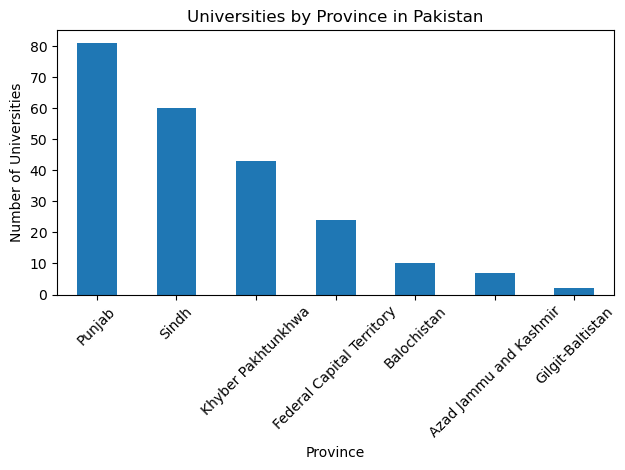

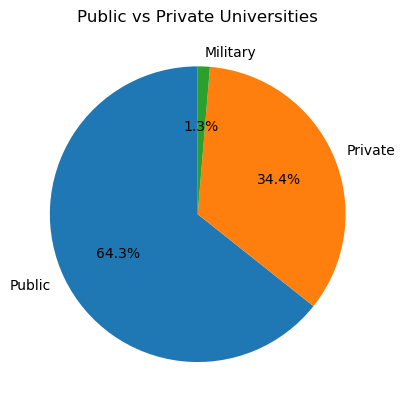

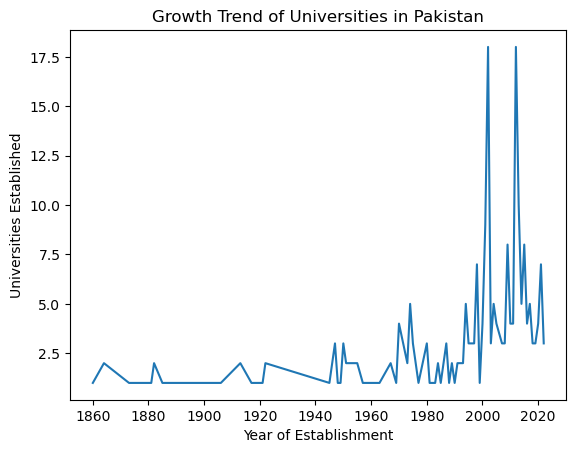

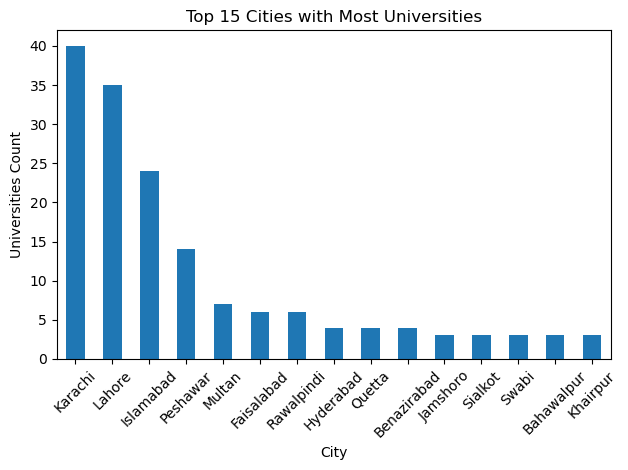

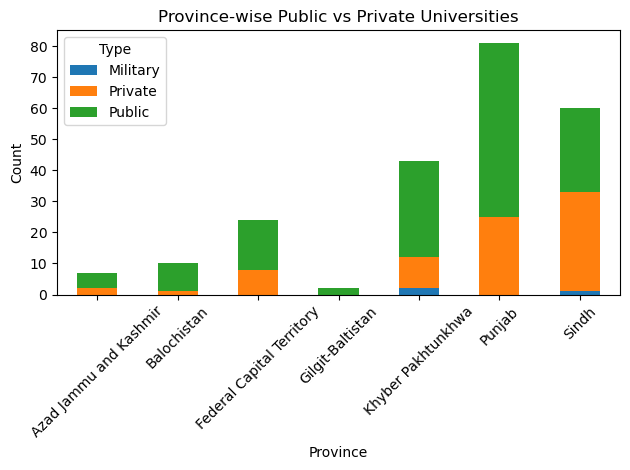

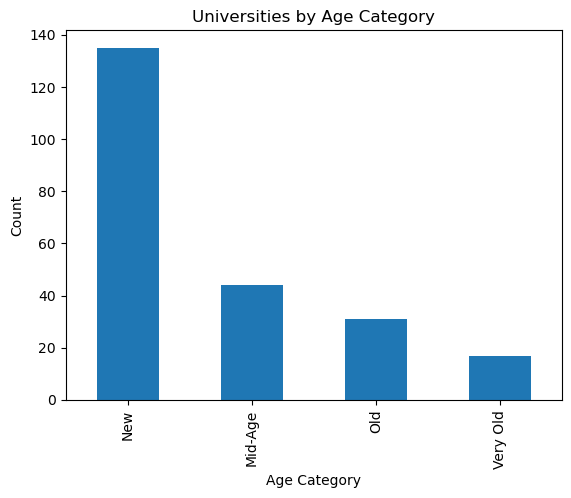


Province Ranking Based on Education Strength:


,Total_Universities,Avg_Age,Score
Province,,,
Punjab,81,40.135802,1.000000
Sindh,60,37.100000,0.814189
Khyber Pakhtunkhwa,43,25.627907,0.573930
Federal Capital Territory,24,33.083333,0.507492
Balochistan,10,22.600000,0.299309
Azad Jammu and Kashmir,7,21.714286,0.268260
Gilgit-Baltistan,2,15.500000,0.169290



Key Insights:
- Total Universities Analyzed: 227
- Highest Universities Province: Punjab
- Education Hub City: Karachi
- Dominant Sector: Public
- Fast Growth Period: Post 2000

Project Completed Successfully ✅


In [25]:

# Universities of Pakistan Project


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# 1. Load Dataset

df = pd.read_csv("All the Universities of Pakistan.csv")

print("Dataset Loaded Successfully")
display(df.head())


# 2. Data Cleaning
# -------------------------------
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Remove duplicate universities
df = df.drop_duplicates(subset="University")

# Handle missing values
df['Established'] = pd.to_numeric(df['Established'], errors='coerce')
df['Province'] = df['Province'].fillna("Unknown")
df['Type'] = df['Type'].fillna("Unknown")
df['Location'] = df['Location'].fillna("Unknown")

print("\nCleaned Dataset Info:")
display(df.info())


# 3. Feature Engineering
# -------------------------------
# Age of university
CURRENT_YEAR = 2025
df['University_Age'] = CURRENT_YEAR - df['Established']

# Category by age
df['Age_Category'] = pd.cut(
    df['University_Age'],
    bins=[0, 25, 50, 100, 200],
    labels=['New', 'Mid-Age', 'Old', 'Very Old']
)


# 4. Overall Statistics (NumPy)
# -------------------------------
years = df['Established'].dropna().values

print("\nStatistical Summary:")
print("Oldest University Year:", np.min(years))
print("Newest University Year:", np.max(years))
print("Average Establishment Year:", int(np.mean(years)))
print("Median Establishment Year:", int(np.median(years)))


# 5. Universities by Province
# -------------------------------
province_count = df['Province'].value_counts()

plt.figure()
province_count.plot(kind='bar')
plt.title("Universities by Province in Pakistan")
plt.xlabel("Province")
plt.ylabel("Number of Universities")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. Public vs Private Analysis
# -------------------------------
type_count = df['Type'].value_counts()

plt.figure()
type_count.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Public vs Private Universities")
plt.ylabel("")
plt.show()


# 7. University Growth Trend 
# -------------------------------
growth = df.groupby('Established').size()

plt.figure()
plt.plot(growth.index, growth.values)
plt.title("Growth Trend of Universities in Pakistan")
plt.xlabel("Year of Establishment")
plt.ylabel("Universities Established")
plt.show()


# 8. Top 15 Education Cities
# -------------------------------
top_cities = df['Location'].value_counts().head(15)

plt.figure()
top_cities.plot(kind='bar')
plt.title("Top 15 Cities with Most Universities")
plt.xlabel("City")
plt.ylabel("Universities Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 9. Province-wise Public vs Private
# -------------------------------
province_type = pd.crosstab(df['Province'], df['Type'])

province_type.plot(kind='bar', stacked=True)
plt.title("Province-wise Public vs Private Universities")
plt.xlabel("Province")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 10. Age Category Distribution
# -------------------------------
age_dist = df['Age_Category'].value_counts()

plt.figure()
age_dist.plot(kind='bar')
plt.title("Universities by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()


# 11. Ranking Provinces (Composite Score)
# -------------------------------
# Score based on number of universities + avg age
province_stats = df.groupby('Province').agg(
    Total_Universities=('University', 'count'),
    Avg_Age=('University_Age', 'mean')
)

# Normalize values
province_stats['Score'] = (
    (province_stats['Total_Universities'] / province_stats['Total_Universities'].max()) * 0.6 +
    (province_stats['Avg_Age'] / province_stats['Avg_Age'].max()) * 0.4
)

province_stats = province_stats.sort_values(by='Score', ascending=False)

print("\nProvince Ranking Based on Education Strength:")
display(province_stats)


# 12. Key Insights (Auto-generated)
# -------------------------------
print("\nKey Insights:")
print(f"- Total Universities Analyzed: {df.shape[0]}")
print(f"- Highest Universities Province: {province_count.idxmax()}")
print(f"- Education Hub City: {top_cities.idxmax()}")
print(f"- Dominant Sector: {type_count.idxmax()}")
print(f"- Fast Growth Period: Post 2000")

print("\nProject Completed Successfully ")
